<a href="https://colab.research.google.com/github/matialecastillo/IntroPythonConColab_PAE_INTA/blob/main/Estad%C3%ADsticas_descriptivas_b%C3%A1sicas_con_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estadísticas descriptivas con Python
Herramientas básicas para ciencia de datos: 
- [numpy](https://numpy.org/)
- [pandas ](https://pandas.pydata.org/docs/index.html)
- [matplotlib](https://matplotlib.org/), [seaborn](https://seaborn.pydata.org/) 
- [scikit-learn](https://scikit-learn.org/stable/index.html)
- [keras](https://keras.io/), [tensorflow](https://www.tensorflow.org/?gclid=Cj0KCQiA4aacBhCUARIsAI55maHcBN9oI7FS-RJSAJzxHrohobl-awsrJPwVfRgCcWHVLljjNrp7YH8aAseEEALw_wcB)

## Intro a pandas
Pandas es la libreria con la que se realiza el manejo de dataframes (tablas de datos). Todas las funciones y métodos están bien documentados y pueden se consultados en https://pandas.pydata.org/

In [13]:
import pandas as pd
iris1 = pd.read_csv("/content/Iris.csv") #lectura del archivo. Se pueden leer varios formatos
iris1.head(5) # Imprime las primeras líneas del dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
iris1.shape

(150, 6)

In [15]:
iris1.index

RangeIndex(start=0, stop=150, step=1)

In [16]:
iris1['SepalWidthCm']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: SepalWidthCm, Length: 150, dtype: float64

In [17]:
iris1.iat[3, 4]

0.2

In [18]:
iris1.iloc[1:10, [1, 4]]

,SepalLengthCm,PetalWidthCm
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2
5,5.4,0.4
6,4.6,0.3
7,5.0,0.2
8,4.4,0.2
9,4.9,0.1


In [19]:
iris1.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [20]:
iris1.isna()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [21]:
iris1.isna().describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150,150,150,150,150,150
unique,1,1,1,1,1,1
top,False,False,False,False,False,False
freq,150,150,150,150,150,150


In [ ]:
# En caso de haber na se puede usar fill.na()
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

# Gráficos básicos 
Casi todos los casos están basados en matplotlib (gráficos al estilo matlab). pandas ofrece una interfaz integrada de gráficos con matplotlib. La fórmula es `data.plot.tipo_grafico()`. El tipo de gráfico se puede pasar como argumento también. 

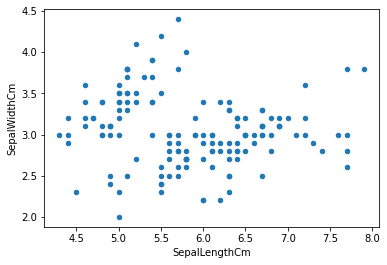

In [25]:
# Scatter plot 
iris1.plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm')

In [ ]:
# Agregando colores para diferenciar por especie
# Defini un diccionario de colores 
colors = {'Iris-setosa':'red', 'Iris-versicolor':'green', 'Iris-virginica':'blue'}
# Mapeo los valores del diccionario. 
iris1.plot.scatter(x ='SepalLengthCm', y ='SepalWidthCm', c=iris1['Species'].map(colors))

In [ ]:
iris1['SepalWidthCm'].plot.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f00ed1af1c0>,
      dtype=object)

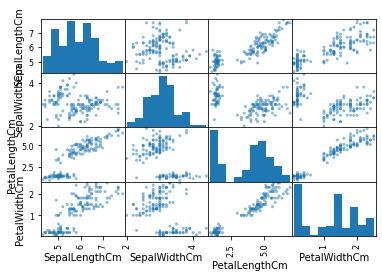

In [26]:
# Matriz de diagramas de dispersión
pd.plotting.scatter_matrix(iris1.loc[:, 'SepalLengthCm':'PetalWidthCm'])

seaborn es otra librería con el que se pueden hacer gráficos (combina funciones de matplotlib)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
plt.subplot(2,2,1) # define una grilla de 4 subplots, e indica qué va a graficar en el primer subplot
sns.violinplot(x='Species',y='PetalLengthCm',data=iris1)
plt.subplot(2,2,2) # en el segundo subplot
sns.violinplot(x='Species',y='PetalWidthCm',data=iris1)
plt.subplot(2,2,3) # en el tercer subplot
sns.violinplot(x='Species',y='SepalLengthCm',data=iris1)
plt.subplot(2,2,4) # en el cuarto subplot
sns.violinplot(x='Species',y='SepalWidthCm',data=iris1)

## Matriz de correlaciones

In [23]:
c = iris1[iris1.columns.difference(['Id'])].corr() # Excluyte la columna Id (no tiene sentido hacer lac orrelacion en esta columna)
c



,PetalLengthCm,PetalWidthCm,SepalLengthCm,SepalWidthCm
PetalLengthCm,1.000000,0.962757,0.871754,-0.420516
PetalWidthCm,0.962757,1.000000,0.817954,-0.356544
SepalLengthCm,0.871754,0.817954,1.000000,-0.109369
SepalWidthCm,-0.420516,-0.356544,-0.109369,1.000000


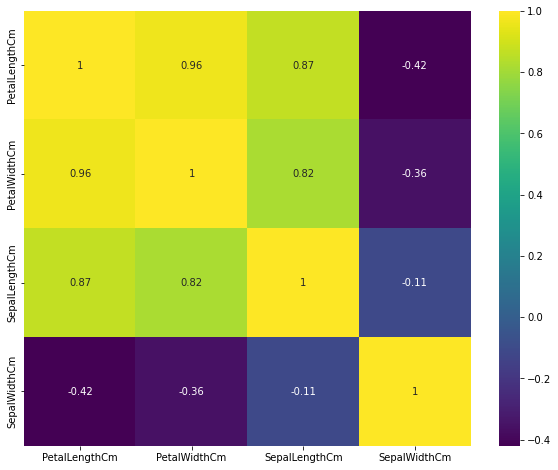

In [24]:
# Plot de correlaciones 
plt.figure(figsize=(10,8)) 
sns.heatmap(c, 
            xticklabels=c.columns.values,
            yticklabels=c.columns.values,
           cmap='viridis', annot=True)
plt.show()

# Introducción a scikit-learn
Scikit-learn es un kit de herramientas para ciencia de datos. La documentacion está super completa y la cantidad de métodos disponibles es amplia. https://scikit-learn.org/stable/

## Clustering no rupervisado: K-means 
Documentación scikit-learn: https://scikit-learn.org/stable/modules/clustering.html#k-means

k-means en detalle: https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

In [67]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, max_iter = 1000) # Inicializa el modelo
km.fit(iris1[iris1.columns.difference(['Id', 'Species'])]) # Ajusta el modelo usando solo las columnas numéricas 

KMeans(max_iter=1000, n_clusters=3)

In [ ]:
km.cluster_centers_

In [ ]:
km.labels_

In [ ]:
iris1['kmean_label'] = km.labels_
iris1

In [ ]:
colors = {0:'red', 1:'green', 2:'blue'}
iris1.plot.scatter(x ='SepalLengthCm', y ='SepalWidthCm', c=iris1['kmean_label'].map(colors))

# PCA y Analisis discriminante
La documentación de scikitlearn es muy completa y ofrece ejemplos reproducibles completos. En particular, el ejemplo de PCA y del análisis discriminante está con el dataset iris!

Página principal: https://scikit-learn.org/stable/

Página PCA: https://scikit-learn.org/stable/modules/decomposition.html#pca

Ejemplo reproducible Iris dataset: https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py


explained variance ratio (first two components): [0.92461872 0.05306648]


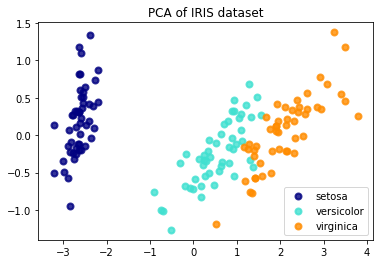

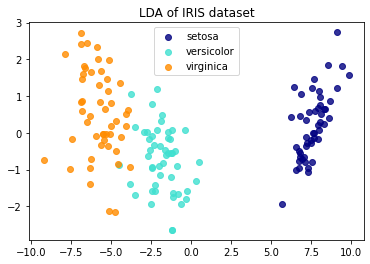

In [103]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()

# De dónde sacar ejemplos 
https://www.kaggle.com/: repositorio de datos, scripts, etc. 